## CSCI 544 HW7

#### Categorization of politically influential text


Authors:
1. Ruchit Gandhi (ruchitsg@usc.edu)
2. Saumya Dureja (sdureja@usc.edu)
3. Gursheen Grewal (gursheeg@usc.edu)
4. Purvak Lapsiya (lapsiya@usc.edu)

In [1]:

import pandas as pd
import json
import pprint
import numpy as np

import string
import unicodedata
import re

import matplotlib.pyplot as plt 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

from gensim import corpora, models
from keras import layers, models, optimizers
from sklearn.decomposition import LatentDirichletAllocation
from yellowbrick.classifier import ClassificationReport

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

#preprocessing pipeline
#Pipeline models features like word count, tfidf, word density, word embeddings (GloVe)

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence
import xgboost

c:\users\purvak\anaconda3\envs\py35\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
c:\users\purvak\anaconda3\envs\py35\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
#reading excel/csv using pandas
df = pd.read_csv('data.csv')

 ## Preprocessing

1. Dropna for dropping null
2. Stripping Hyperlinks
3. Expanding english language contractions 
4. Remove Hashtags
5. Remove special characters

In [3]:
# Selecting subset of columns and droping rows with Null value in 'label' column

df = df[['full_text', 'Label']]
# df = df.dropna(subset=['Label'])
df = df.dropna()
df.columns = ['data', 'label']

In [4]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text


#code source is http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "i'm": "i am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expand_contractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    text = c_re.sub(replace, text.lower())
    return text

def strip_mentions_hashtags(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [5]:
# data cleaning and processing
df['data'] = df['data'].apply(lambda x : strip_links(x))
df['data'] = df['data'].apply(lambda x : expand_contractions(x))
df['data'] = df['data'].apply(lambda x : strip_mentions_hashtags(x))
df['data'] = df['data'].apply(lambda x : remove_special_characters(x))

## Feature engineering

1. Encoding output as 1/0
2. Using count vectorizer to calculate count of word in corpus
3. Word level tf-idf
4. ngram (2-3) tf-idf
5. GLoVe Vector embeddings
6. Topic Modelling
7. Sentiment analysis

In [6]:
#splitting dataset into train and validation set (80% - 20% default)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['data'], df['label'])

#Label Encoder converts yes and no into 1 and 0

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

#Count vectorizer will calculate count of every word in text data and will ignore number and whitespaces

count_vector = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vector.fit(df['data'])

#using the count vector defined above, we'll transform our existing text data into train_x_count where every row will indicate 
#tweet and every column will represent count of word indexed at that loc

train_x_count = count_vector.transform(train_x)
valid_x_count = count_vector.transform(valid_x)

#word level tf-idf

tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['data'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)


#ngram level tf-idf
tfidf_ngram = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(2,3) ,max_features=5000)
tfidf_ngram.fit(df['data'])
xtrain_tfidf_ngram = tfidf_ngram.transform(train_x)
xvalid_tfidf_ngram = tfidf_ngram.transform(valid_x)

from keras.preprocessing import text, sequence
token = text.Tokenizer()
token.fit_on_texts(df['data'])
word_index = token.word_index

train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)


In [7]:
#glove word_emb
#Using code base of hw5

from __future__ import division
import sys,json,math
import os
import numpy as np

def load_word2vec(filename):
    # Returns a dict containing a {word: numpy array for a dense word vector} mapping.
    # It loads everything into memory.
    
    w2vec={}
    with open(filename,"r", encoding='utf8') as f_in:
        for line in f_in:
            line_split=line.replace("\n","").split()
            w=line_split[0]
            vec=np.array([float(x) for x in line_split[1:]])
            w2vec[w]=vec
    return w2vec


In [8]:
#word embedding extraction
word_to_vec_dict = load_word2vec('glove.6B.300D.txt')

import numpy
emb_matrix = numpy.zeros((len(word_index)+1, 300))
for word, i in word_index.items():
    emb_vect = word_to_vec_dict.get(word)
    if emb_vect is not None:
        emb_matrix[i] = emb_vect

In [9]:
dataset_train = pd.DataFrame(train_x)
dataset_valid = pd.DataFrame(valid_x)

In [10]:
# combined dataset for running topic modelling
dataset_for_topic_model = pd.concat([dataset_train, dataset_valid], axis=0)

In [11]:
# Topic Modelling
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset_for_topic_model['data'])
lda = LatentDirichletAllocation(random_state=0)
doc_topic_matrix = lda.fit_transform(X)

c:\users\purvak\anaconda3\envs\py35\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [12]:
# Assign Sentiment scores to text
dataset_train['comp'] = dataset_train['data'].apply(lambda x : analyser.polarity_scores(x)['compound'])
dataset_train['pos'] = dataset_train['data'].apply(lambda x : analyser.polarity_scores(x)['pos'])
dataset_train['neu'] = dataset_train['data'].apply(lambda x : analyser.polarity_scores(x)['neu'])
dataset_train['neg'] = dataset_train['data'].apply(lambda x : analyser.polarity_scores(x)['neg'])

dataset_valid['comp'] = dataset_valid['data'].apply(lambda x : analyser.polarity_scores(x)['compound'])
dataset_valid['pos'] = dataset_valid['data'].apply(lambda x : analyser.polarity_scores(x)['pos'])
dataset_valid['neu'] = dataset_valid['data'].apply(lambda x : analyser.polarity_scores(x)['neu'])
dataset_valid['neg'] = dataset_valid['data'].apply(lambda x : analyser.polarity_scores(x)['neg'])

In [13]:
# combine sentiment features with count vectorizer features
train_x_count = pd.DataFrame(np.concatenate((train_x_count.toarray(), dataset_train[['comp', 'pos', 'neu', 'neg']].values, doc_topic_matrix[:len(train_x)]), axis=1))
valid_x_count = pd.DataFrame(np.concatenate((valid_x_count.toarray(), dataset_valid[['comp', 'pos', 'neu', 'neg']].values, doc_topic_matrix[len(train_x):]), axis=1))

# combine sentiment features with tf-idf features
xtrain_tfidf = pd.DataFrame(np.concatenate((xtrain_tfidf.toarray(), dataset_train[['comp', 'pos', 'neu', 'neg']].values, doc_topic_matrix[:len(train_x)]), axis=1))
xvalid_tfidf = pd.DataFrame(np.concatenate((xvalid_tfidf.toarray(), dataset_valid[['comp', 'pos', 'neu', 'neg']].values, doc_topic_matrix[len(train_x):]), axis=1))

## Models

1. Naive Bayes 
2. Logistic Regression
3. Xgboost
4. Shallow Neural Network
5. RNN with GRU

In [14]:
# Function to train model and evaluate based on accuracy
def train_model(classifier, feature_vector_train,label, feature_vector_valid, is_neural_net = False):
    classifier.fit(feature_vector_train, label)
    prediction = classifier.predict(feature_vector_valid)
    from sklearn.metrics import confusion_matrix
    if not is_neural_net:
        print(confusion_matrix(valid_y, prediction))
    if is_neural_net:
        prediction = prediction.argmax(axis=-1)
    return metrics.accuracy_score(prediction, valid_y)

In [15]:
count_vector = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vector.fit(df['data'])
nb_train_x_count = count_vector.transform(train_x)
nb_valid_x_count = count_vector.transform(valid_x)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['data'])
nb_xtrain_tfidf = tfidf_vect.transform(train_x)
nb_xvalid_tfidf = tfidf_vect.transform(valid_x)



clf = naive_bayes.MultinomialNB()
accuracy = train_model(clf, nb_train_x_count, train_y, nb_valid_x_count)
print("Naive Bayes (Count Vectors)",accuracy)
accuracy = train_model(clf, nb_xtrain_tfidf, train_y, nb_xvalid_tfidf)
print("Naive Bayes (TDIDF)", accuracy)

[[206  45]
 [ 44  31]]
Naive Bayes (Count Vectors) 0.726993865031
[[251   0]
 [ 73   2]]
Naive Bayes (TDIDF) 0.776073619632


In [16]:
clf = linear_model.LogisticRegression()
accuracy = train_model(clf, train_x_count, train_y, valid_x_count)
print("LR using CV", accuracy)
accuracy = train_model(clf, xtrain_tfidf, train_y, xvalid_tfidf)
print("LR using CV", accuracy)

[[229  22]
 [ 45  30]]
LR using CV 0.794478527607
[[244   7]
 [ 54  21]]
LR using CV 0.812883435583


In [17]:
accuracy = train_model(xgboost.XGBClassifier(), train_x_count, train_y, valid_x_count)
print("xgboost using CV", accuracy)
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("xgboost using TFIDF", accuracy)

[[230  21]
 [ 49  26]]
xgboost using CV 0.78527607362
[[230  21]
 [ 53  22]]
xgboost using TFIDF 0.773006134969


In [18]:
#Shallow Neural Networks

def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 


In [19]:
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy)

Epoch 1/1
976/976 [==============================] - 0s - loss: 0.6609     
NN, Ngram Level TF IDF Vectors 0.769938650307


In [20]:
def create_rnn_gru():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[emb_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print(accuracy)


Epoch 1/1
976/976 [==============================] - 4s - loss: 0.5958     
0.769938650307


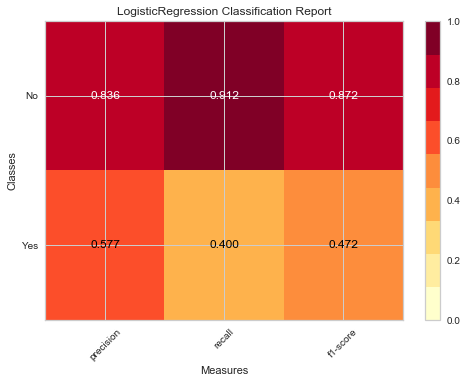

In [21]:
classes=['No','Yes']
visualizer=ClassificationReport(clf,classes=classes)

visualizer.fit(train_x_count, train_y)
visualizer.score(valid_x_count, valid_y)
visualizer.poof()